In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time
import warnings
from sklearn.datasets import make_regression
import pylab

In [33]:
country_temp = pd.read_csv("./cleanglobaltemp.csv",index_col='dt',parse_dates=[0])
country_temp.head()

,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,,
1743,0,4.384,2.294,Åland
1744,5,1.530,4.680,Åland
1744,6,6.702,1.789,Åland
1744,7,11.609,1.577,Åland
1744,8,15.342,1.410,Åland


In [34]:
country_temp_clnd = country_temp.dropna(axis = 0, how ='any')
country_temp_clnd.head()

,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,,
1743,0,4.384,2.294,Åland
1744,5,1.530,4.680,Åland
1744,6,6.702,1.789,Åland
1744,7,11.609,1.577,Åland
1744,8,15.342,1.410,Åland


In [35]:
country_temp_clnd.reset_index(inplace=True)
country_temp_clnd.head()

,dt,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,0,4.384,2.294,Åland
1,1744,5,1.530,4.680,Åland
2,1744,6,6.702,1.789,Åland
3,1744,7,11.609,1.577,Åland
4,1744,8,15.342,1.410,Åland


In [36]:
country_temp_USA = country_temp_clnd[country_temp_clnd.Country == "United States"]
country_temp_USA.head()

,dt,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,Country
524171,1768,554880,15.420,2.880,United States
524172,1768,554881,8.162,3.386,United States
524173,1768,554882,1.591,3.783,United States
524174,1768,554883,-2.882,4.979,United States
524175,1769,554884,-3.952,4.856,United States


In [37]:
#Group by date and find mean
groupby_dt = country_temp_USA.groupby("dt")
mean_agg = groupby_dt["AverageTemperature"].mean()
temperature_df = mean_agg.to_frame()
temperature_df = temperature_df.reset_index()
temperature_df.head()

,dt,AverageTemperature
0,1768,5.572750
1,1769,10.446500
2,1774,1.603000
3,1775,9.499167
4,1776,8.110000


In [38]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = temperature_df.dt.values.reshape(-1, 1)
y = temperature_df.AverageTemperature.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (215, 1) (215, 1)


array([[1768],
       [1769],
       [1774],
       [1775],
       [1776],
       [1777],
       [1778],
       [1779],
       [1781],
       [1782],
       [1796],
       [1797],
       [1811],
       [1812],
       [1813],
       [1814],
       [1815],
       [1816],
       [1817],
       [1818],
       [1819],
       [1820],
       [1821],
       [1822],
       [1823],
       [1824],
       [1825],
       [1826],
       [1827],
       [1828],
       [1829],
       [1830],
       [1831],
       [1832],
       [1833],
       [1834],
       [1835],
       [1836],
       [1837],
       [1838],
       [1839],
       [1840],
       [1841],
       [1842],
       [1843],
       [1844],
       [1845],
       [1846],
       [1847],
       [1848],
       [1849],
       [1850],
       [1851],
       [1852],
       [1853],
       [1854],
       [1855],
       [1856],
       [1857],
       [1858],
       [1859],
       [1860],
       [1861],
       [1862],
       [1863],
       [1864],
       [18

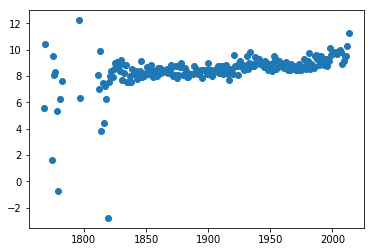

In [39]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [40]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [41]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[0.01060786]]
y-axis intercept:  [-11.74041103]


In [43]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1768]]
Max X Value: [[2013]]


In [44]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

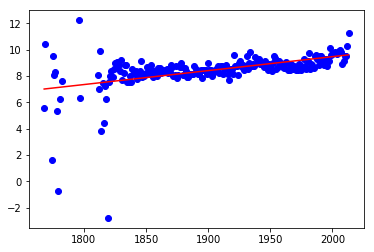

In [45]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [46]:
y_min_actual = y.min()
y_max_actual = y.max()

In [47]:
y_min = -11.74 * 1768 + 0.011
y_max = -11.74 * 2013 + 0.011
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: -2.7746666666666666
Calculated Min Value: -20756.309
Actual Max Value: 12.231
Calculated Max Value: -23632.609


In [48]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: -2.7746666666666666
Predicted Min Value: [[7.01429041]]
Actual Max Value: 12.231
Predicted Max Value: [[9.6132168]]


In [49]:
print(x_min, x_max, y_min, y_max)

x_plot_min = x_min[0][0]
print(x_plot_min)

x_plot_max = x_max[0][0]
print(x_plot_max)

y_plot_min = y_min_predicted[0][0]
print(y_plot_min)

y_plot_max = y_max_predicted[0][0]
print(y_plot_max)

[[1768]] [[2013]] -20756.309 -23632.609
1768
2013
7.014290412327883
9.61321680008424


In [50]:
#[[1768]] [[2013]] -20756.309 -23632.609
# x_min = 1768
# x_max = 2013
# y_min = 7.01
# y_max = 9.61

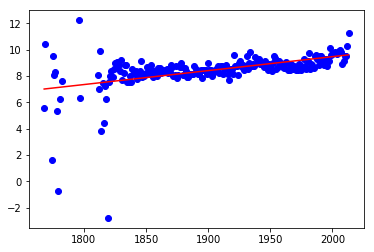

In [51]:
#Current Data with ~250 years
plt.scatter(X, y, c='blue')
plt.plot([x_plot_min, x_plot_max], [y_plot_min, y_plot_max], c='red')

In [53]:
#Added Trend line
# fig, ax = plt.subplots(facecolor='#D7BCC8')
pylab.plot(x_axis,y_axis,'o')
a[0]
z = np.polyfit(a[0], b[0], 1)
p = np.poly1d(z)
pylab.plot(x_axis, p(x_axis), "#FF6123")
plt.xlabel(x_axis,y_axis,label="Year")
plt.ylabel(x_axis,y_axis,label="Average Temperature")

NameError: name 'x_axis' is not defined

Text(0.5, 1.0, 'Trend from last ~250 years till 2013')

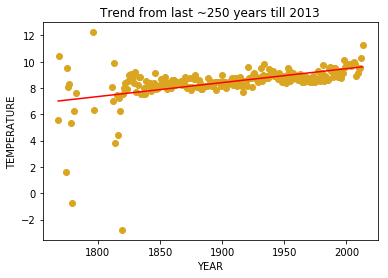

In [142]:
#Current Temperature Data for ~250 years
plt.scatter(X, y, c='goldenrod')
plt.plot([x_plot_min, x_plot_max], [y_plot_min, y_plot_max], c='red')
ax=plt.plot(x ='YEAR', y='Temperature', kind = 'line',title="Current data with 170 years")
#ax=Final_df.plot(title="Rising Sea Level")
plt.xlabel("YEAR")
plt.ylabel("TEMPERATURE")
plt.title ("Trend from last ~250 years till 2013")

NameError: name 'pylab' is not defined

[[12.2651825]]


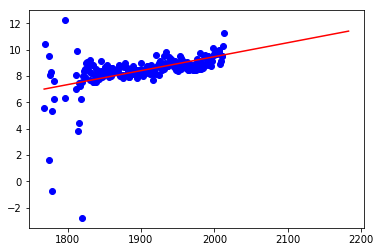

In [117]:
#Projected rise in temperature - 170 years from 2013
model.predict([[2263]])
print(model.predict([[2263]]))
plt.scatter(X, y, c='blue')
plt.plot([1768, 2183], [7.01, 11.41655348], c='red')

[[12.2651825]]


Text(0.5, 1.0, 'Trend from 2013 to 2263')

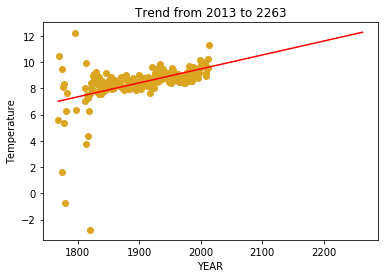

In [121]:
#Projected rise in temperature - ~250 years from 2013
model.predict([[2263]])
print(model.predict([[2263]]))
plt.scatter(X, y, c='goldenrod')
plt.plot([1768, 2263], [7.01, 12.2651825], c='red')
#ax=Final_df.plot(title="Rising Sea Level")
plt.xlabel("YEAR")
plt.ylabel("Temperature")
plt.title ("Trend from 2013 to 2263")

[[10.69521881]]


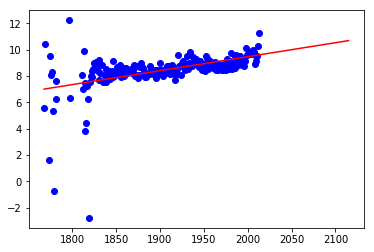

In [123]:
#Projected rise in temperature - ~100 years from 2013
model.predict([[2115]])
print(model.predict([[2115]]))
plt.scatter(X, y, c='blue')
plt.plot([1768, 2115], [7.01, 10.69521881], c='red')

[[10.69521881]]


Text(0.5, 1.0, 'Trend from 2013 to 2115 (~100 years)')

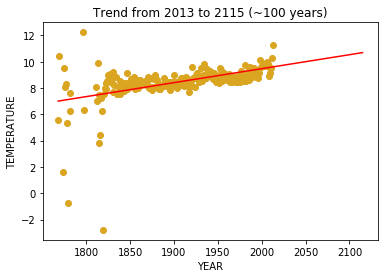

In [141]:
#Projected rise in temperature - 100 years from 2013
model.predict([[2115]])
print(model.predict([[2115]]))
plt.scatter(X, y, c='goldenrod')
plt.plot([1768, 2115], [7.01, 10.69521881], c='red')
#ax=Final_df.plot(title="Rising Sea Level")
plt.xlabel("YEAR")
plt.ylabel("TEMPERATURE")
plt.title ("Trend from 2013 to 2115 (~100 years)")

[[10.53610086]]


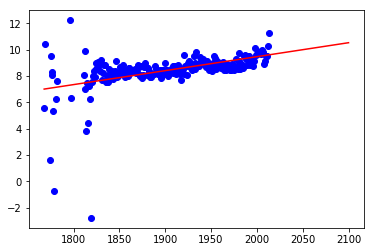

In [132]:
#Projected rise in temperature - 87 years from 2013
model.predict([[2100]])
print(model.predict([[2100]]))
plt.scatter(X, y, c='blue')
plt.plot([1768, 2100], [7.01, 10.53610086], c='red')

[[10.53610086]]


Text(0.5, 1.0, 'Trend from 2013 to 2100')

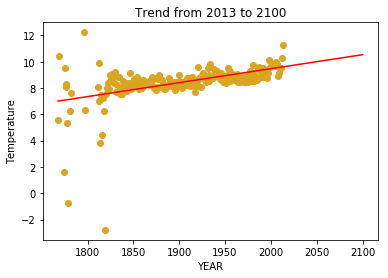

In [112]:
#Projected rise in temperature - 87 years from 2013
model.predict([[2100]])
print(model.predict([[2100]]))
plt.scatter(X, y, c='goldenrod')
plt.plot([1768, 2100], [7.01, 10.53610086], c='red')
#ax=Final_df.plot(title="Rising Sea Level")
plt.xlabel("YEAR")
plt.ylabel("Temperature")
plt.title ("Trend from 2013 to 2100")

[[10.14360994]]


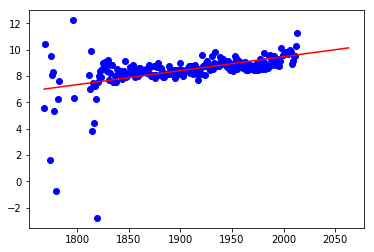

In [29]:
#Projected rise in temperature - 50 years from 2013
model.predict([[2063]])
print(model.predict([[2063]]))
plt.scatter(X, y, c='blue')
plt.plot([1768, 2063], [7.01, 10.14360994], c='red')

[[10.16482567]]


Text(0.5, 1.0, 'Trend from 2013 to 2065 (~50 years)')

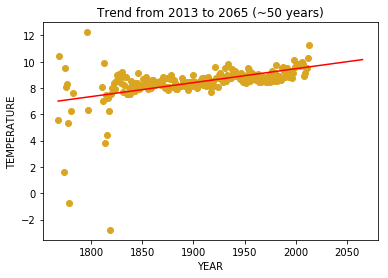

In [140]:
#Projected rise in temperature - ~50 years from 2013
model.predict([[2065]])
print(model.predict([[2065]]))
plt.scatter(X, y, c='goldenrod')
plt.plot([1768, 2065], [7.01, 10.16482567], c='red')
#ax=Final_df.plot(title="Rising Sea Level")
plt.xlabel("YEAR")
plt.ylabel("TEMPERATURE")
plt.title ("Trend from 2013 to 2065 (~50 years)")

[[9.87841337]]


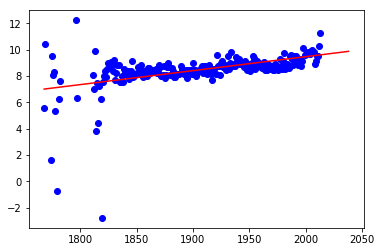

In [30]:
#Projected rise in temperature - 25 years from 2013
model.predict([[2038]])
print(model.predict([[2038]]))
plt.scatter(X, y, c='blue')
plt.plot([1768, 2038], [7.01, 9.87841337], c='red')

[[9.8996291]]


Text(0.5, 1.0, 'Trend from 2013 to 2040 (~25 years)')

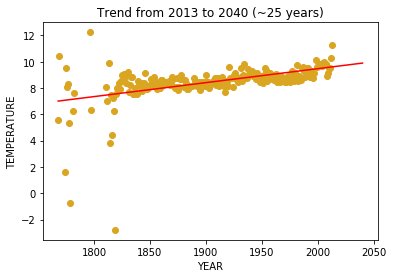

In [139]:
#Projected rise in temperature - ~25 years from 2013
model.predict([[2040]])
print(model.predict([[2040]]))
plt.scatter(X, y, c='goldenrod')
plt.plot([1768, 2040], [7.01, 9.8996291], c='red')
#ax=Final_df.plot(title="Rising Sea Level")
plt.xlabel("YEAR")
plt.ylabel("TEMPERATURE")
plt.title ("Trend from 2013 to 2040 (~25 years)")

In [114]:
#Projected rise in temperature - 170 years from 2013
model.predict([[2183]])

array([[11.41655348]])

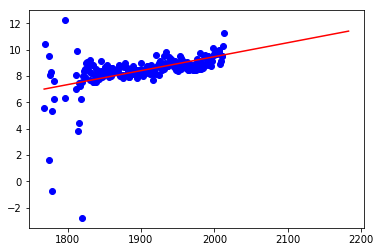

In [115]:
plt.scatter(X, y, c='blue')
plt.plot([1768, 2183], [7.01, 11.41655348], c='red')

In [116]:
#Projected rise in temperature - 100 years from 2013
model.predict([[2113]])

array([[10.67400308]])

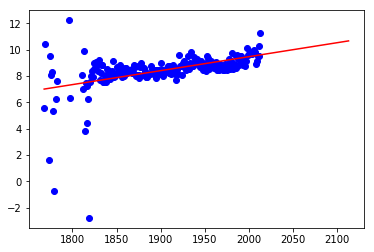

In [118]:
plt.scatter(X, y, c='blue')
plt.plot([1768, 2113], [7.01, 10.67400308], c='red')

In [119]:
#Projected rise in temperature - 50 years from 2013
model.predict([[2063]])

array([[10.14360994]])

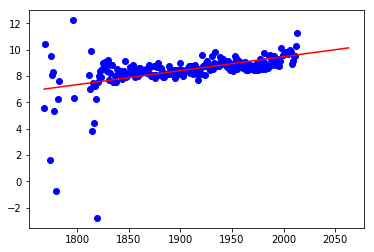

In [120]:
plt.scatter(X, y, c='blue')
plt.plot([1768, 2063], [7.01, 10.14360994], c='red')

In [121]:
#Projected rise in temperature - 25 years from 2013
model.predict([[2038]])

array([[9.87841337]])

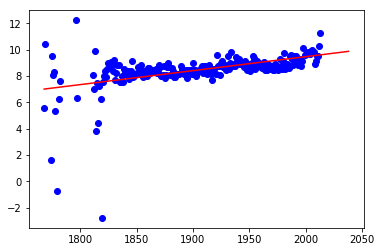

In [123]:
plt.scatter(X, y, c='blue')
plt.plot([1768, 2038], [7.01, 9.87841337], c='red')

In [ ]:
ax=Final_df.plot(x ='YEAR', y='Global Mean Sea Level', kind = 'line',title="Rising Sea Level")
#ax=Final_df.plot(title="Rising Sea Level")
ax.set_xlabel("YEAR(1993-2019)")
ax.set_ylabel("Global Mean Sea Level")

In [ ]:
#plt.scatter(X, y, c='blue')
#plt.plot([1768, 2100], [7.01, 10.53610086], c='red')

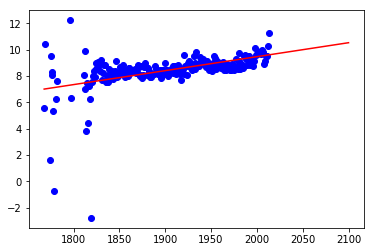

In [80]:
#plt.scatter(X, y, c='blue')
#plt.plot([1768, 2100], [7.01, 10.53610086], c='red')

In [79]:
model.predict([[2100]])

array([[10.53610086]])